# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [38]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########

        print('calculating S_W')
        S_W = np.zeros((n_features, n_features))
        for i in labels:
            print(i,'/',len(labels))
            subData = X[y==i]
            S_i = np.zeros((n_features, n_features))
            u_i = np.mean(subData, axis=0)
            for j in range(subData.shape[0]):
                diff = (subData[j] - u_i).reshape(n_features, 1)
                S_i += np.dot(diff, diff.T)
        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        print('calculating S_B')
        S_B = np.zeros((n_features, n_features))
        u = np.mean(X, axis=0)
        for i in labels:
            subData = X[y==i]
            Ni = subData.shape[0]
            diff = (np.mean(subData, axis=0) - u).reshape(n_features, 1)
            S_B += Ni * np.dot(diff, diff.T)


        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        print('calculating SW_inv_SB')
        print(np.linalg.det(S_W))
        SW_inv_SB = np.dot(np.linalg.pinv(S_W), S_B)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        print('calculating eigenvalues and eigenvectors')
        eigenvalues, eigenvectors = np.linalg.eig(SW_inv_SB)
        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        return None
    
    def transform(self, X):
        ########### Write Your Code Here ###########
        return np.dot(X, self.eigenvectors)
    

- <font size=4> Dimensionality reduction visualization<font>

calculating S_W
0 / 3
1 / 3
2 / 3
calculating S_B
calculating SW_inv_SB
0.0
calculating eigenvalues and eigenvectors


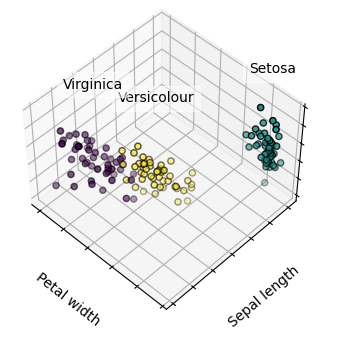

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
# ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [3]:
########### Write Your Code Here ###########

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

############################################

###  Visualization of MINIST

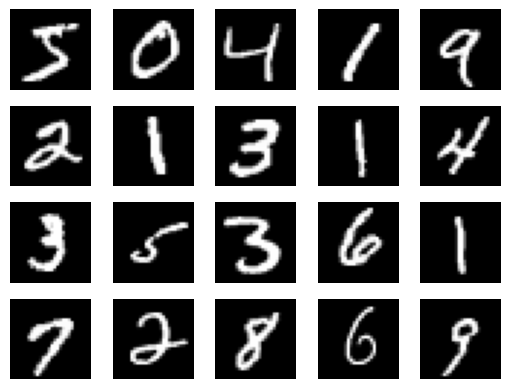

In [4]:
# Visualize MINIST
########### Write Your Code Here ###########

# Visualize the first 20 images
fig, ax = plt.subplots(4, 5)
for i in range(20):
    ax.flat[i].imshow(X[i].reshape(28, 28), cmap='gray')
    ax.flat[i].axis('off')
plt.show()
############################################

### Fit  Model

In [6]:
########### Write Your Code Here ###########

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X, y)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)




############################################

## Evaluate model

In [7]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

############################################


0.8675428571428572


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


优点：
1.相比于PCA，LDA使用均值而不是方差
2.LDA可用于分类
缺点：
1.不适合非高斯分布的数据
2.对样本分类信息依靠方差而不是均值的时候效果不好
3.难以处理稀疏的数据

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

1.PCA使用方差，LDA使用均值
2.PCA为无监督，LDA为有监督
3.PCA无法分类，LDA可以分类
4.LDA选择分类性能最好的方向投影，PCA选择样本点投影具有最大方差的方向